### Preliminaries
> conda install -c conda-forge tikzmagic 


If you want to normalize a vector to L1-norm or L2-norm, use:

In [1]:
from __future__ import print_function, division
import numpy as np

pr = np.array([1,2,3])
print("L1-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,1)))
print("L2-norm of {0} is {1}".format(pr, pr / np.linalg.norm(pr,2)))

L1-norm of [1 2 3] is [ 0.16666667  0.33333333  0.5       ]
L2-norm of [1 2 3] is [ 0.26726124  0.53452248  0.80178373]


In [2]:
%load_ext tikzmagic

# Exercise 3: Link based ranking (SOLUTION)

## Question 1 - Page Rank (Eigen-vector method)

First we need to define a function to construct the R matrix from the L matrix. We can do it by matrix multiplication. But because a column can be all zeros in general, it is safer to do it programmatically.

In [3]:
def create_Rmatrix(L):
#     R = np.multiply(L, 1 / np.sum(L,axis=0)) # Use this matrix multiplication for faster running time if no column is zero
    X = np.sum(L,axis=0)
    n_nodes = L.shape[0]
    R = np.zeros((n_nodes, n_nodes))
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            R[i,j] = 1 / X[0,j] if X[0,j] != 0 else 0
            
    R = np.multiply(L,R)
    return R

In [4]:
"""Some time we might want to compute R outside the function to avoid recomputing large matrix"""
def pagerank_eigen(L, R=None):
#   Construct transition probability matrix from L
    if R is None: R = create_Rmatrix(L)
#     Compute eigen-vectors and eigen-values of R
    eigenvalues, eigenvectors = np.linalg.eig(R)
#     Take the eigen-vector with maximum eigven-value
    p = eigenvectors[:,np.argmax(np.absolute(eigenvalues))]
    return (R,p)

1.Link page A to page B

Result:
$
L =
  \begin{bmatrix}
	0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 0 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0 \\
1 \\
0 \\
  \end{bmatrix}
$

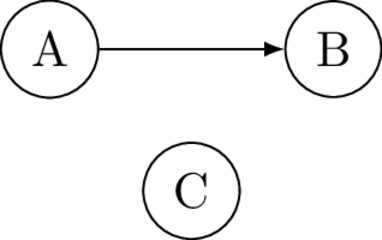

In [5]:
%%tikz
\node[draw,circle] (A) at  (0,0) {A};
\node[draw,circle] (C) at  (1,-1) {C};
\node[draw,circle] (B) at  (2,0) {B};
\draw[->, >=latex] (A)  to (B);

In [6]:
L = np.matrix([
    [0,0,0], 
    [1,0,0], 
    [0,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

L=[[0 0 0]
 [1 0 0]
 [0 0 0]]
R=[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]
p=[[ 0.]
 [ 1.]
 [ 0.]]


2.Link all pages to each other

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2} & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.577 \\
0.577 \\
0.577 \\
  \end{bmatrix}
$

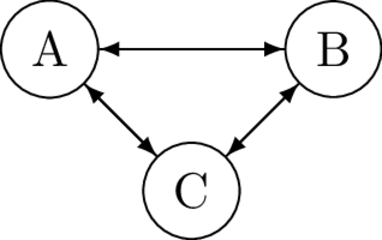

In [7]:
%%tikz
\node[draw,circle] (A) at  (0,0) {A};
\node[draw,circle] (C) at  (1,-1) {C};
\node[draw,circle] (B) at  (2,0) {B};
\draw[->, >=latex] (A) to (B);
\draw[->, >=latex] (A) to (C);
\draw[->, >=latex] (B) to (A);
\draw[->, >=latex] (B) to (C);
\draw[->, >=latex] (C) to (A);
\draw[->, >=latex] (C) to (B);

In [8]:
L = np.matrix([
    [0,1,1], 
    [1,0,1], 
    [1,1,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

L=[[0 1 1]
 [1 0 1]
 [1 1 0]]
R=[[ 0.   0.5  0.5]
 [ 0.5  0.   0.5]
 [ 0.5  0.5  0. ]]
p=[[ 0.57735027]
 [ 0.57735027]
 [ 0.57735027]]


3.Link page A to both B and C, and link pages B and C to A.

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 1 & 1 \\
\frac{1}{2} & 0 & 0 \\
\frac{1}{2} & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.816 \\
0.408 \\
0.408 \\
  \end{bmatrix}
$

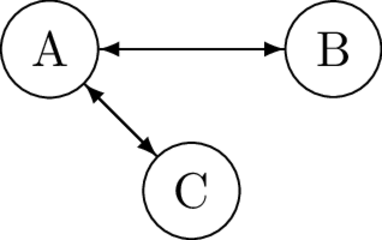

In [9]:
%%tikz
\node[draw,circle] (A) at  (0,0) {A};
\node[draw,circle] (C) at  (1,-1) {C};
\node[draw,circle] (B) at  (2,0) {B};
\draw[->, >=latex] (A) to (B);
\draw[->, >=latex] (A) to (C);
\draw[->, >=latex] (B) to (A);
\draw[->, >=latex] (C) to (A);

In [10]:
L = np.matrix([
    [0,1,1], 
    [1,0,0], 
    [1,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

L=[[0 1 1]
 [1 0 0]
 [1 0 0]]
R=[[ 0.   1.   1. ]
 [ 0.5  0.   0. ]
 [ 0.5  0.   0. ]]
p=[[ 0.81649658]
 [ 0.40824829]
 [ 0.40824829]]


4.Use the previous links and add a link from page C to page B

Result:
$
L =
  \begin{bmatrix}
	0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 0 & 0 \\
  \end{bmatrix}
 ,
R =
  \begin{bmatrix}
	0 & 1 & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & 0 \\
  \end{bmatrix}
  ,
  \vec{p} =
  \begin{bmatrix}
	0.743 \\
0.557 \\
0.371 \\
  \end{bmatrix}
$

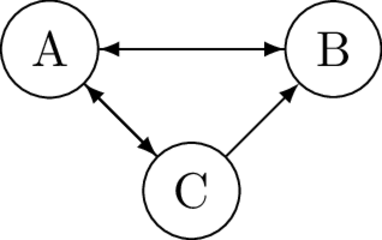

In [11]:
%%tikz
\node[draw,circle] (A) at  (0,0) {A};
\node[draw,circle] (C) at  (1,-1) {C};
\node[draw,circle] (B) at  (2,0) {B};
\draw[->, >=latex] (A) to (B);
\draw[->, >=latex] (A) to (C);
\draw[->, >=latex] (B) to (A);
\draw[->, >=latex] (C) to (A);
\draw[->, >=latex] (C) to (B);

In [12]:
L = np.matrix([
    [0,1,1], 
    [1,0,1], 
    [1,0,0]
])

R,p = pagerank_eigen(L)
print("L={0}\nR={1}\np={2}".format(L,R,p))

L=[[0 1 1]
 [1 0 1]
 [1 0 0]]
R=[[ 0.   1.   0.5]
 [ 0.5  0.   0.5]
 [ 0.5  0.   0. ]]
p=[[-0.74278135+0.j]
 [-0.55708601+0.j]
 [-0.37139068+0.j]]


## Question 2 - Page Rank (Iterative method)

We implement the PageRank iterative method

In [13]:
def pagerank_iterative(L, R=None):
    if R is None: #We might want to compute R outside this function to avoid recomputing large matrix
        R = np.multiply(L, 1 / np.sum(L,axis=0))
        
    N = R.shape[0]
    e = np.ones(shape=(N,1))
    q = 0.9

    p = e
    delta = 1
    epsilon = 0.001
    i = 0
    while delta > epsilon:
        p_prev = p
        p = np.matmul(q * R, p_prev)
        p = p + (1-q) / N * e
        delta = np.linalg.norm(p-p_prev,1)
        i += 1

    print("Converged after {0} iterations".format(i))
    return R,p

#### Construct link matrix from dataset

In [14]:
n_nodes = 0
nodes_idx = dict() #Since the nodeIDs are not from 0 to N we need to build an index of nodes
nodes = [] #We also want to store nodeIDs to return the result of ranking vector

# Read the nodes
with open("ca-GrQc.txt") as f:
    for line in f:
        if '#' not in line:
            source = int(line.split()[0])
            target = int(line.split()[1])
            if source not in nodes_idx.keys():
                nodes_idx[source] = n_nodes
                nodes.append(source)
                n_nodes += 1
            if target not in nodes_idx.keys():
                nodes_idx[target] = n_nodes
                nodes.append(target)
                n_nodes += 1
print(n_nodes)
print(nodes[:3])

5242
[3466, 937, 5233]


In [15]:
L = np.zeros((n_nodes, n_nodes))
# Read the edges
with open("ca-GrQc.txt") as f:
    for line in f:
        if "#" not in line:
            source = int(line.split()[0])
            target = int(line.split()[1])
            L[nodes_idx[target], nodes_idx[source]] = 1 #Columns of link matrix are from-vertices
print(L)

[[ 0.  1.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  1.  1.  0.]]


#### Compute transition probability matrix

In [16]:
# Here I use matrix multiplication from numpy for faster running time
R = np.multiply(L, 1 / np.sum(L,axis=0))
# R = create_Rmatrix(L) # This is much slower
print(R)

[[ 0.     0.2    0.5   ...,  0.     0.     0.   ]
 [ 0.125  0.     0.    ...,  0.     0.     0.   ]
 [ 0.125  0.     0.    ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.     0.5    0.5  ]
 [ 0.     0.     0.    ...,  0.5    0.     0.5  ]
 [ 0.     0.     0.    ...,  0.5    0.5    0.   ]]


#### You will see that eigen-vector method is slow and has some numerical issues

In [17]:
import time
start_time = time.time()
R,p = pagerank_eigen(L, R)
print("--- %s seconds ---" % (time.time() - start_time))
print("Ranking vector: p={0}".format(p))
# print(eigenvectors)

--- 78.6914858818 seconds ---
Ranking vector: p=[ 0.01151345+0.j  0.00719591+0.j  0.00287836+0.j ...,  0.00000000+0.j
  0.00000000+0.j  0.00000000+0.j]


#### Iterative method

In [18]:
import time
start_time = time.time()
R, p = pagerank_iterative(L,R)
print("--- %s seconds ---" % (time.time() - start_time))
print("Ranking vector: p={0}".format(p[:,0]))

Converged after 128 iterations
--- 15.6382029057 seconds ---
Ranking vector: p=[  2.91315639e-04   1.88382754e-04   8.39741651e-05 ...,   1.92156702e-04
   1.92156702e-04   1.92156702e-04]


#### Extract top-k nodes from the ranking vector

In [19]:
arr = np.array(p[:,0])
k = 3
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} nodes: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

Top-3 nodes: [14265 13801 13929]
Their scores: [ 0.00144951  0.00141553  0.00138011]


## Question 3 - Ranking Methodology (Hard)
https://www.overleaf.com/read/gwkhfmgkdnnv

## Question 4 - Hub and Authority

We implement the HITs algorithm: 

In [20]:
def hits_iterative(A, k = 10):
    N = A.shape[0]
    x0, y0 = 1 / (N*N) * np.ones(N), 1 / (N*N) * np.ones(N) 
    xprev, yprev = x0, y0
    delta1 = delta2 = 1
    epsilon = 0.001 # We can strictly check for convergence rate of HITS algorithm
    l = 0
    while l < k and delta1 > epsilon and delta2 > epsilon:
        y = np.matmul(A, xprev)
        x = np.matmul(np.transpose(A), yprev)
        x = x / np.linalg.norm(x,2)
        y = y / np.linalg.norm(y,2)
        delta1 = np.linalg.norm(x-xprev,1)
        delta2 = np.linalg.norm(y-yprev,1)
        xprev = x
        yprev = y
        l += 1
    
    print("Ran a total of {0} iterations with the convergence rate delta1, delta2={1},{2}".format(l, delta1, delta2))
    return xprev, yprev

### a)

In [21]:
A=np.array([
    [0, 1, 1, 1], 
    [0, 0, 1, 1], 
    [1, 0, 0, 1],
    [0, 0, 0, 1],
])

x, y = hits_iterative(A, 100)
print("Result using iterative method:\n Authoriy vector x={0}\n Hub vector y={1}".format(x, y))

Ran a total of 9 iterations with the convergence rate delta1, delta2=0.000765572838959,0.0016260291592
Result using iterative method:
 Authoriy vector x=[ 0.16878931  0.27236456  0.49773665  0.80596894]
 Hub vector y=[ 0.65546933  0.54214151  0.40516824  0.33508393]


**Details:**
+ Initialization: 
  
  $x_0 = \frac{1}{4^2}(1,1,1,1) = ( 0.0625,  0.0625,  0.0625,  0.0625)$
  
  $y_0 = \frac{1}{4^2}(1,1,1,1) = ( 0.0625,  0.0625,  0.0625,  0.0625)$
  
+ $k=1$:
  
  $x_1 = \frac{A^t y_0}{||A^t y_0||} = (0.21320072,  0.21320072,  0.42640143,  0.85280287)$
  
  $y_1 = \frac{A x_0}{|| A x_0 ||} = (0.70710678,  0.47140452,  0.47140452,  0.23570226)$
  
+ ...:
  
+ $k=6$:
  
   $x_6 = \frac{A^t y_5}{||A^t y_5||} = (0.16887796,  0.27257494,  0.49774555, 0.80587375)$
  
  $y_6 = \frac{A x_5}{||A x_5||} = (0.65357971,  0.54153747,  0.40815386,  0.33612671)$
  

**Conclusion:**
+ Best authority node: $n_4$. Best hub node: $n_1$.
 
**Check with the theoretical result (convergence condition):**
  
+ $x^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A^t A$: $(0.16845787,  0.27257056,  0.49801119,  0.80579904)$
  
+ $y^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A A^t$: $(0.65549599,  0.54215478,  0.4051188,   0.33507008)$

### b)
We reuse the link matrix $L$ to compute the adjacency matrix $A$ of the dataset

In [22]:
A = np.transpose(L)
print(A)

[[ 0.  1.  1. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  1.  1.  0.]]


Run HITS algorithm:

In [23]:
x, y = hits_iterative(A, 100)
print("Result using iterative method:\n Authoriy vector x={0}\n Hub vector y={1}".format(x, y))

Ran a total of 39 iterations with the convergence rate delta1, delta2=0.000984604838695,0.000984604838697
Result using iterative method:
 Authoriy vector x=[  3.48948810e-05   1.45965389e-05   6.68131703e-06 ...,   1.28245551e-54
   1.28245551e-54   1.28245551e-54]
 Hub vector y=[  3.48948810e-05   1.45965389e-05   6.68131703e-06 ...,   1.28245551e-54
   1.28245551e-54   1.28245551e-54]


**You can see that the two authority vector and hub vector are the same. So the network must be an undirected graph**

**Interpret the result:**

In [24]:
k = 3

arr = np.array(x)
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} authorities: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

arr = np.array(y)
k_idx = arr.argsort()[-k:][::-1]
print("Top-{0} hubs: {1}".format(k, np.array(nodes)[k_idx]))
print("Their scores: {0}".format(arr[k_idx]))

Top-3 authorities: [21012  2741 12365]
Their scores: [ 0.15556238  0.15357488  0.15307255]
Top-3 hubs: [21012  2741 12365]
Their scores: [ 0.15556238  0.15357488  0.15307255]


**We can also use linear algebra property of HITS to compute the result (slide "Convergence of HITS"):**.
  
+ $x^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A^t A$
+ $y^*$ is the principal eigenvector (i.e. with largest eigenvalue) of $A A^t$

However, the computation will be much slower

In [25]:
xstar_ev, xstar = np.linalg.eig(np.matmul(np.transpose(A),A))
ystar_ev, ystar = np.linalg.eig(np.matmul(A,np.transpose(A)))
xstar, ystar = xstar[:,np.argmax(np.absolute(xstar_ev))], ystar[:,np.argmax(np.absolute(ystar_ev))]
# ystar = -xstar if all(xstar<0) else xstar
# ystar = -ystar if all(ystar<0) else ystar
print("Result using linear algebra:\n Authoriy vector x={0}\n Hub vector y={1}".format(xstar, ystar))

Result using linear algebra:
 Authoriy vector x=[  3.48948725e-05+0.j   1.45965100e-05+0.j   6.68130767e-06+0.j ...,
   0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 Hub vector y=[  3.48948725e-05+0.j   1.45965100e-05+0.j   6.68130767e-06+0.j ...,
   0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
